In [2]:
import numpy
import matplotlib.pyplot as plt
# from google.colab import files
#import io
import pandas as pd

# data=files.upload()

In [1]:
import pandas as pd

# Path to the TSV file
tsv_file_path = 'eng-via-fin_translations.tsv'

# Read the TSV file into a pandas DataFrame
data_frame = pd.read_csv(tsv_file_path, delimiter='\t')

# Assuming the column names are known, you can access the desired columns
original_gold_text_column = 'gold'
round_trip_translation_column = 'backtranslated'

# Access the columns and display the contents
original_gold_text = data_frame[original_gold_text_column]
round_trip_translation = data_frame[round_trip_translation_column]

print("\nOriginal Gold Text:")
print(original_gold_text)

print("\nRound Trip Translation:")
print(round_trip_translation)



Original Gold Text:
0                     Do any of you know where he lives?
1                    Tom didn't take his sunglasses off.
2                                       She pinched him.
3      Toucans regulate their body temperature by adj...
4                    You can trust him to keep his word.
                             ...                        
115                         Tom oiled his bicycle chain.
116            I'll see him if he doesn't come too late.
117    Tom was never afraid even to talk about his ow...
118                   We all laughed at his pink tuxedo.
119                                 Get him out of here!
Name: gold, Length: 120, dtype: object

Round Trip Translation:
0                        Does anyone know where he lives
1                     Tom didn't take off his sunglasses
2                                       She pinched him.
3      Toucans regulate their body temperature by adj...
4                  You can count on him to keep his word
   

In [4]:
import pandas as pd

# Path to the TSV file
tsv_file_path = 'eng-via-fin_translations.tsv'

# Read the TSV file into a pandas DataFrame
data_frame = pd.read_csv(tsv_file_path, delimiter='\t')

# Display the column names
print("Column names:")
print(data_frame.columns.tolist())


Column names:
['gold', 'backtranslated']


In [5]:
import pandas as pd

# Path to the TSV file
tsv_file_path = 'eng-via-fin_translations.tsv'

# Read the TSV file into a pandas DataFrame
data_frame = pd.read_csv(tsv_file_path, delimiter='\t')

# Initialize counters for each pronoun class
he_count = 0
she_count = 0
they_count = 0
total_sentences = len(data_frame)

# Iterate over the sentences in the "gold" column
for sentence in data_frame['gold']:
    sentence_lower = sentence.lower()
    
    # Check if the sentence contains the pronoun class and update the respective counter
    if 'he' in sentence_lower or 'him' in sentence_lower or 'his' in sentence_lower:
        he_count += 1
    if 'she' in sentence_lower or 'her' in sentence_lower or 'hers' in sentence_lower:
        she_count += 1
    if 'they' in sentence_lower or 'them' in sentence_lower or 'their' in sentence_lower or 'theirs' in sentence_lower:
        they_count += 1

# Calculate the proportions
he_proportion = he_count / total_sentences
she_proportion = she_count / total_sentences
they_proportion = they_count / total_sentences

# Print the table
print("Pronoun class\t\tProportion of sentences")
print("he/him/his\t\t{:.2%}".format(he_proportion))
print("she/her/hers\t\t{:.2%}".format(she_proportion))
print("they/them/their/theirs\t{:.2%}".format(they_proportion))


Pronoun class		Proportion of sentences
he/him/his		100.00%
she/her/hers		34.17%
they/them/their/theirs	13.33%


In [ ]:
import nltk
import spacy

from nltk.util import ngrams
from collections import Counter
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

def compute_scores(gold, backtranslated):
    scores = []
    for i in range(len(gold)):
        gold_tokens = nltk.word_tokenize(gold[i].lower())
        backtranslated_tokens = nltk.word_tokenize(backtranslated[i].lower())

        gold_unigrams = ngrams(gold_tokens, 1)
        backtranslated_unigrams = ngrams(backtranslated_tokens, 1)

        gold_unigrams_counts = Counter(gold_unigrams)
        backtranslated_unigrams_counts = Counter(backtranslated_unigrams)

        intersection = gold_unigrams_counts & backtranslated_unigrams_counts
        precision = sum(intersection.values()) / sum(backtranslated_unigrams_counts.values()) if sum(backtranslated_unigrams_counts.values()) != 0 else 0
        recall = sum(intersection.values()) / sum(gold_unigrams_counts.values()) if sum(gold_unigrams_counts.values()) != 0 else 0
        f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
        scores.append((precision, recall, f1_score))

    mean_precision = sum([score[0] for score in scores]) / len(scores)
    mean_recall = sum([score[1] for score in scores]) / len(scores)
    mean_f1_score = sum([score[2] for score in scores]) / len(scores)
    return mean_precision, mean_recall


def transformer_mean(gold_sentences,translated_sentences):
    model = SentenceTransformer('all-MiniLM-L6-v2')
    # compute the sentence embeddings
    gold_embeddings = model.encode(gold_sentences)
    translated_embeddings = model.encode(translated_sentences)

    # compute the cosine similarity between each pair of gold and translated sentence embeddings
    similarities = cosine_similarity(gold_embeddings, translated_embeddings)

    # compute the average cosine similarity
    avg_similarity = similarities.mean()

    print(f"Average cosine similarity: {avg_similarity}")

    # count the number of translations that have a cosine similarity of 1
    num_perfect_translations = 0
    for sim in similarities.diagonal():
        if sim == 1.0:
            num_perfect_translations += 1
    print(f"Number of perfect translations: {num_perfect_translations}")


tsv_file_path = 'eng-via-fin_translations.tsv'

# Read the TSV file into a pandas DataFrame
data_frame = pd.read_csv(tsv_file_path, delimiter='\t')


# Replace 'gold_col' and 'back_translated_col' with the actual column names in your TSV file
gold = data_frame['gold'].tolist()
backtranslated = data_frame['backtranslated'].tolist()

#print(gold) # Prints the contents of the 'gold_col' column as a list
#print(backtranslated) # Prints the contents of the 'back_translated_col' column as a list

print("mean precision and mean recall are :",compute_scores(gold,backtranslated))
transformer_mean(gold,backtranslated)






mean precision and mean recall are : (0.842912812949577, 0.7352961368942567)
Average cosine similarity: 0.1611451953649521
Number of perfect translations: 8


In [65]:
import nltk
import spacy

from nltk.util import ngrams
from collections import Counter
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

def compute_scores(gold, backtranslated):
    scores = []
    i = 0
    while i < len(gold):
        gold_tk = nltk.word_tokenize(gold[i].lower())
        backtranslated_tk = nltk.word_tokenize(backtranslated[i].lower())

        gold_unigrams = ngrams(gold_tk, 1)
        backtranslated_unigrams = ngrams(backtranslated_tk, 1)

        countgolduni = Counter(gold_unigrams)
        countbacktranslateduni = Counter(backtranslated_unigrams)

        intersection = countgolduni & countbacktranslateduni
        precision = sum(intersection.values()) / sum(countbacktranslateduni.values()) if sum(countbacktranslateduni.values()) != 0 else 0
        recall = sum(intersection.values()) / sum(countgolduni.values()) if sum(countgolduni.values()) != 0 else 0
        f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
        scores.append((precision, recall, f1_score))

        i += 1

    mean_precision = sum([score[0] for score in scores]) / len(scores)
    mean_recall = sum([score[1] for score in scores]) / len(scores)
    mean_f1_score = sum([score[2] for score in scores]) / len(scores)
    return mean_precision, mean_recall, mean_f1_score



def compute_cosine_similarity(gold_sentences, translated_sentences):
    model = SentenceTransformer('all-MiniLM-L6-v2')
    # Compute the sentence embeddings
    gold_embeddings = model.encode(gold_sentences)
    translated_embeddings = model.encode(translated_sentences)

    # Compute the cosine similarity between each pair of gold and translated sentence embeddings
    similarities = cosine_similarity(gold_embeddings, translated_embeddings)

    # Compute the average cosine similarity
    avg_similarity = similarities.mean()

    # Count the number of translations that have a cosine similarity of 1
    num_perfect_translations = sum(similarities.diagonal() == 1.0)

    return avg_similarity, num_perfect_translations


tsv_file_path = 'eng-via-fin_translations.tsv'

# Read the TSV file into a pandas DataFrame
data_frame = pd.read_csv(tsv_file_path, delimiter='\t')

# Replace 'gold_col' and 'back_translated_col' with the actual column names in your TSV file
gold = data_frame['gold'].tolist()
backtranslated = data_frame['backtranslated'].tolist()

# Calculate precision, recall, and F1 score
mean_precision, mean_recall, mean_f1_score = compute_scores(gold, backtranslated)

# Calculate average cosine similarity and number of perfect translations
avg_similarity, num_perfect_translations = compute_cosine_similarity(gold, backtranslated)

print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1 Score:", mean_f1_score)
print("Average Cosine Similarity:", avg_similarity)
print("Number of Perfect Translations:", num_perfect_translations)


Mean Precision: 0.842912812949577
Mean Recall: 0.7352961368942567
Mean F1 Score: 0.7796731249575726
Average Cosine Similarity: 0.1611452
Number of Perfect Translations: 8


In [ ]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

def compute_cosine_similarity(sentences):
    # Load the pre-trained model
    model = SentenceTransformer('bert-base-nli-mean-tokens')

    # Compute cosine similarity for each sentence pair
    similarities = []
    num_perfect_matches = 0

    for index, sentence in sentences.iterrows():
        # Encode the gold and translated sentences
        gold_embedding = model.encode([sentence['gold']])
        translated_embedding = model.encode([sentence['backtranslated']])
        #print(gold_embedding,translated_embedding)


        # Compute cosine similarity
        similarity = cosine_similarity(gold_embedding, translated_embedding)[0][0]
        similarities.append(similarity)

        # Check if the similarity is 1
        if similarity == 1:
            num_perfect_matches += 1

    # Compute the average cosine similarity
    average_similarity = sum(similarities) / len(similarities)

    return average_similarity, num_perfect_matches

# Read the eng-via-fin_translations.tsv file into a DataFrame
data = pd.read_csv('eng-via-fin_translations.tsv', sep='\t')

# Call the function to compute the cosine similarity
average_similarity, num_perfect_matches = compute_cosine_similarity(data)

# Print the results
print("Average Cosine Similarity: {:.4f}".format(average_similarity))
print("Number of Perfect Matches: {}".format(num_perfect_matches))



Average Cosine Similarity: 0.9264
Number of Perfect Matches: 7


In [ ]:
import pandas as pd
import re

# Read the eng-via-fin_translations.tsv file into a DataFrame
data = pd.read_csv('eng-via-fin_translations.tsv', sep='\t')

# Select three pairs of sentences
pairs = data.sample(n=3)

for index, pair in pairs.iterrows():
    # Extract pronouns from the Gold sentence
    gold_sentence = pair['gold']
    gold_pronouns = re.findall(r'\b(?:he|him|his|herself|she|her|hers|they|them|their|theirs|themselves)\b', gold_sentence, flags=re.IGNORECASE)

    # Extract pronouns from the Translated sentence
    translated_sentence = pair['backtranslated']
    translated_pronouns = re.findall(r'\b(?:he|him|his|herself|she|her|hers|they|them|their|theirs|themselves)\b', translated_sentence, flags=re.IGNORECASE)

    # Print the pronouns for the Gold and Translated sentences
    print("Pair {}: Gold Pronouns: {}".format(index + 1, gold_pronouns))
    print("Pair {}: Translated Pronouns: {}".format(index + 1, translated_pronouns))
    print()


Pair 102: Gold Pronouns: ['he', 'his']
Pair 102: Translated Pronouns: ['he', 'his']

Pair 1: Gold Pronouns: ['he']
Pair 1: Translated Pronouns: ['he']

Pair 95: Gold Pronouns: ['she']
Pair 95: Translated Pronouns: ['they', 'their']



In [ ]:
import pandas as pd
import re

# Read the eng-via-fin_translations.tsv file into a DataFrame
data = pd.read_csv('eng-via-fin_translations.tsv', sep='\t')

# Select three pairs of sentences
pairs = data.sample(n=3).reset_index(drop=True)

# Create empty lists to store the gold and translated pronouns
gold_pronouns_list = []
translated_pronouns_list = []

for index, pair in pairs.iterrows():
    # Extract pronouns from the Gold sentence
    gold_sentence = pair['gold']
    gold_pronouns = re.findall(r'\b(?:he|him|his|herself|she|her|hers|they|them|their|theirs|themselves)\b', gold_sentence, flags=re.IGNORECASE)
    gold_pronouns_list.append(gold_pronouns)

    # Extract pronouns from the Translated sentence
    translated_sentence = pair['backtranslated']
    translated_pronouns = re.findall(r'\b(?:he|him|his|herself|she|her|hers|they|them|their|theirs|themselves)\b', translated_sentence, flags=re.IGNORECASE)
    translated_pronouns_list.append(translated_pronouns)

    # Print the pronouns for the Gold and Translated sentences
    print("Pair {}: Gold Pronouns: {}".format(index + 1, gold_pronouns))
    print("Pair {}: Translated Pronouns: {}".format(index + 1, translated_pronouns))
    print()

# Add the pronouns lists to the DataFrame
pairs['gold_pronouns'] = gold_pronouns_list
pairs['translated_pronouns'] = translated_pronouns_list

# Initialize a variable to keep track of the number of pairs with the same number of pronouns
same_pronouns_count = 0

# Iterate over the pairs
for index, pair in pairs.iterrows():
    gold_pronouns = pair['gold_pronouns']
    translated_pronouns = pair['translated_pronouns']

    # Check if the lengths of the pronoun lists are equal
    if len(gold_pronouns) == len(translated_pronouns):
        same_pronouns_count += 1

# Compute the proportion of pairs with the same number of pronouns
proportion = same_pronouns_count / len(pairs)

# Round the proportion to three decimal places
proportion = round(proportion, 3)

# Print the proportion
print("Proportion of pairs with the same number of pronouns: {}".format(proportion))


Pair 1: Gold Pronouns: ['he']
Pair 1: Translated Pronouns: ['he']

Pair 2: Gold Pronouns: ['him']
Pair 2: Translated Pronouns: ['his']

Pair 3: Gold Pronouns: ['she']
Pair 3: Translated Pronouns: ['he']

Proportion of pairs with the same number of pronouns: 1.0


In [ ]:
import pandas as pd
import re

# Read the eng-via-fin_translations.tsv file into a DataFrame
data = pd.read_csv('eng-via-fin_translations.tsv', sep='\t')

# Select three pairs of sentences
pairs = data.sample(n=3).reset_index(drop=True)

# Create empty lists to store the gold and translated pronouns
gold_pronouns_list = []
translated_pronouns_list = []

for index, pair in pairs.iterrows():
    # Extract pronouns from the Gold sentence
    gold_sentence = pair['gold']
    gold_pronouns = re.findall(r'\b(?:he|him|his|she|her|hers|they|them|their|theirs)\b', gold_sentence, flags=re.IGNORECASE)
    gold_pronouns_list.append(gold_pronouns)

    # Extract pronouns from the Translated sentence
    translated_sentence = pair['backtranslated']
    translated_pronouns = re.findall(r'\b(?:he|him|his|she|her|hers|they|them|their|theirs)\b', translated_sentence, flags=re.IGNORECASE)
    translated_pronouns_list.append(translated_pronouns)

    # Print the pronouns for the Gold and Translated sentences
    print("Pair {}: Gold Pronouns: {}".format(index + 1, gold_pronouns))
    print("Pair {}: Translated Pronouns: {}".format(index + 1, translated_pronouns))
    print()

# Add the pronouns lists to the DataFrame
pairs['gold_pronouns'] = gold_pronouns_list
pairs['translated_pronouns'] = translated_pronouns_list

# Initialize variables to keep track of the number of pairs with the same number of pronouns
same_pronouns_count = 0

# Iterate over the pairs
for index, pair in pairs.iterrows():
    gold_pronouns = pair['gold_pronouns']
    translated_pronouns = pair['translated_pronouns']

    # Check if the lengths of the pronoun lists are equal for gold and translated sentences
    if len(gold_pronouns) == len(translated_pronouns):
        same_pronouns_count += 1

# Compute the proportion of pairs with the same number of pronouns
proportion = same_pronouns_count / len(pairs)

# Round the proportion to three decimal places
proportion = round(proportion, 3)

# Print the pronoun proportions
print("Proportion of gold pairs with the same number of pronouns: {}".format(proportion))
print("Proportion of translated pairs with the same number of pronouns: {}".format(proportion))
print("Proportion of pairs with the same number of pronouns: {}".format(proportion))


Pair 1: Gold Pronouns: ['his']
Pair 1: Translated Pronouns: ['his']

Pair 2: Gold Pronouns: ['his']
Pair 2: Translated Pronouns: ['his']

Pair 3: Gold Pronouns: ['her']
Pair 3: Translated Pronouns: ['him']

Proportion of gold pairs with the same number of pronouns: 1.0
Proportion of translated pairs with the same number of pronouns: 1.0
Proportion of pairs with the same number of pronouns: 1.0


In [ ]:
import pandas as pd
import re

# Read the eng-via-fin_translations.tsv file into a DataFrame
data = pd.read_csv('eng-via-fin_translations.tsv', sep='\t')

# Select three pairs of sentences
pairs = data.sample(n=3).reset_index(drop=True)

# Create empty lists to store the gold and translated pronouns
gold_pronouns_list = []
translated_pronouns_list = []

for index, pair in pairs.iterrows():
    # Extract pronouns from the Gold sentence
    gold_sentence = pair['gold']
    gold_pronouns = re.findall(r'\b(?:he|him|his|she|her|hers|they|them|their|theirs|themselves)\b', gold_sentence, flags=re.IGNORECASE)
    gold_pronouns_list.append(gold_pronouns)

    # Extract pronouns from the Translated sentence
    translated_sentence = pair['backtranslated']
    translated_pronouns = re.findall(r'\b(?:he|him|his|herself|she|her|hers|they|them|their|theirs|themselves)\b', translated_sentence, flags=re.IGNORECASE)
    translated_pronouns_list.append(translated_pronouns)

    # Print the pronouns for the Gold and Translated sentences
    print("Pair {}: Gold Pronouns: {}".format(index + 1, gold_pronouns))
    print("Pair {}: Translated Pronouns: {}".format(index + 1, translated_pronouns))
    print()

# Add the pronouns lists to the DataFrame
pairs['gold_pronouns'] = gold_pronouns_list
pairs['translated_pronouns'] = translated_pronouns_list

# Initialize a dictionary to store the co-occurrence counts
cooccurrence_counts = {}

# Iterate over the pairs
for index, pair in pairs.iterrows():
    gold_pronouns = pair['gold_pronouns']
    translated_pronouns = pair['translated_pronouns']

    # Check if the lengths of the pronoun lists are equal for gold and translated sentences
    if len(gold_pronouns) == len(translated_pronouns):
        # Iterate over the pronouns in the pair
        for gold_pronoun in gold_pronouns:
            for translated_pronoun in translated_pronouns:
                # Create a key for the co-occurrence pair
                key = gold_pronoun + '|' + translated_pronoun

                # Update the co-occurrence count
                if key in cooccurrence_counts:
                    cooccurrence_counts[key] += 1
                else:
                    cooccurrence_counts[key] = 1

# Print the co-occurrence counts
print("Co-occurrence counts:")
for key, count in cooccurrence_counts.items():
    print(key + ':', count)


Pair 1: Gold Pronouns: ['his']
Pair 1: Translated Pronouns: ['his']

Pair 2: Gold Pronouns: ['him']
Pair 2: Translated Pronouns: ['him']

Pair 3: Gold Pronouns: ['his']
Pair 3: Translated Pronouns: ['his']

Co-occurrence counts:
his|his: 2
him|him: 1


In [ ]:
import pandas as pd
import re

# Read the eng-via-fin_translations.tsv file into a DataFrame
data = pd.read_csv('eng-via-fin_translations.tsv', sep='\t')

# Select three pairs of sentences
pairs = data.sample(n=3).reset_index(drop=True)

# Create empty lists to store the gold and translated pronouns
gold_pronouns_list = []
translated_pronouns_list = []

for index, pair in pairs.iterrows():
    # Extract pronouns from the Gold sentence
    gold_sentence = pair['gold']
    gold_pronouns = re.findall(r'\b(?:he|him|his|she|her|hers|they|them|their|theirs)\b', gold_sentence, flags=re.IGNORECASE)
    gold_pronouns_list.append(gold_pronouns)

    # Extract pronouns from the Translated sentence
    translated_sentence = pair['backtranslated']
    translated_pronouns = re.findall(r'\b(?:he|him|his|she|her|hers|they|them|their|theirs)\b', translated_sentence, flags=re.IGNORECASE)
    translated_pronouns_list.append(translated_pronouns)

    # Print the pronouns for the Gold and Translated sentences
    print("Pair {}: Gold Pronouns: {}".format(index + 1, gold_pronouns))
    print("Pair {}: Translated Pronouns: {}".format(index + 1, translated_pronouns))
    print()

# Add the pronouns lists to the DataFrame
pairs['gold_pronouns'] = gold_pronouns_list
pairs['translated_pronouns'] = translated_pronouns_list

# Initialize variables to keep track of the number of pairs with the same number of pronouns
same_pronouns_gold_count = 0
same_pronouns_translated_count = 0

# Iterate over the pairs
for index, pair in pairs.iterrows():
    gold_pronouns = pair['gold_pronouns']
    translated_pronouns = pair['translated_pronouns']

    # Check if the lengths of the pronoun lists are equal for gold and translated sentences
    if len(gold_pronouns) == len(translated_pronouns):
        same_pronouns_gold_count += 1
        same_pronouns_translated_count += 1

# Compute the proportions
proportion_gold = same_pronouns_gold_count / len(pairs)
proportion_translated = same_pronouns_translated_count / len(pairs)

# Round the proportions to three decimal places
proportion_gold = round(proportion_gold, 3)
proportion_translated = round(proportion_translated, 3)

# Print the proportions
print("Proportion of gold pairs with the same number of pronouns: {}".format(proportion_gold))
print("Proportion of translated pairs with the same number of pronouns: {}".format(proportion_translated))


Pair 1: Gold Pronouns: ['His', 'his']
Pair 1: Translated Pronouns: ['His', 'his']

Pair 2: Gold Pronouns: ['his']
Pair 2: Translated Pronouns: ['his']

Pair 3: Gold Pronouns: ['his']
Pair 3: Translated Pronouns: ['his']

Proportion of gold pairs with the same number of pronouns: 1.0
Proportion of translated pairs with the same number of pronouns: 1.0


In [ ]:
import pandas as pd
import re

# Read the eng-via-fin_translations.tsv file into a DataFrame
data = pd.read_csv('eng-via-fin_translations.tsv', sep='\t')

# Define the pairs of sentences
pairs = [
    {
        'gold': "Pair 1: Gold Pronouns: ['his']",
        'translated': "Pair 1: Translated Pronouns: ['his']"
    },
    {
        'gold': "Pair 2: Gold Pronouns: ['his']",
        'translated': "Pair 2: Translated Pronouns: ['his']"
    },
    {
        'gold': "Pair 3: Gold Pronouns: ['her']",
        'translated': "Pair 3: Translated Pronouns: ['him']"
    }
]

# Initialize a dictionary to store the co-occurrence counts
cooccurrence_counts = {}

# Iterate over the pairs
for pair in pairs:
    # Extract pronouns from the Gold sentence
    gold_pronouns = re.findall(r"\b(?:he|him|his|herself|she|her|hers|they|them|their|theirs|themselves)\b", pair['gold'], flags=re.IGNORECASE)

    # Extract pronouns from the Translated sentence
    translated_pronouns = re.findall(r"\b(?:he|him|his|herself|she|her|hers|they|them|their|theirs|themselves)\b", pair['translated'], flags=re.IGNORECASE)

    # Print the pronouns for the Gold and Translated sentences
    print(pair['gold'])
    print(pair['translated'])
    print()

    # Check if the lengths of the pronoun lists are equal
    if len(gold_pronouns) == len(translated_pronouns):
        # Iterate over the pronouns in the pair
        for gold_pronoun in gold_pronouns:
            for translated_pronoun in translated_pronouns:
                # Create a key for the co-occurrence pair
                key = gold_pronoun + '|' + translated_pronoun

                # Update the co-occurrence count
                if key in cooccurrence_counts:
                    cooccurrence_counts[key] += 1
                else:
                    cooccurrence_counts[key] = 1

# Print the co-occurrence counts
print("Co-occurrence counts:")
for key, count in cooccurrence_counts.items():
    print(key + ':', count)


Pair 1: Gold Pronouns: ['his']
Pair 1: Translated Pronouns: ['his']

Pair 2: Gold Pronouns: ['his']
Pair 2: Translated Pronouns: ['his']

Pair 3: Gold Pronouns: ['her']
Pair 3: Translated Pronouns: ['him']

Co-occurrence counts:
his|his: 2
her|him: 1


In [ ]:
import pandas as pd
import re

# Read the eng-via-fin_translations.tsv file into a DataFrame
data = pd.read_csv('eng-via-fin_translations.tsv', sep='\t')

# Define the pairs of sentences
pairs = [
    {
        'gold': "Pair 1: Gold Pronouns: ['his']",
        'translated': "Pair 1: Translated Pronouns: ['his']"
    },
    {
        'gold': "Pair 2: Gold Pronouns: ['his']",
        'translated': "Pair 2: Translated Pronouns: ['his']"
    },
    {
        'gold': "Pair 3: Gold Pronouns: ['her']",
        'translated': "Pair 3: Translated Pronouns: ['him']"
    }
]

# Initialize a list to store the proportions
proportions = []

# Iterate over the pairs
for pair in pairs:
    # Extract pronouns from the Gold sentence
    gold_pronouns = re.findall(r"\b(?:he|him|his|herself|she|her|hers|they|them|their|theirs|themselves)\b", pair['gold'], flags=re.IGNORECASE)

    # Extract pronouns from the Translated sentence
    translated_pronouns = re.findall(r"\b(?:he|him|his|herself|she|her|hers|they|them|their|theirs|themselves)\b", pair['translated'], flags=re.IGNORECASE)

    # Compute the proportion of pronouns that match identically at each position
    match_count = sum(gold == translated for gold, translated in zip(gold_pronouns, translated_pronouns))
    proportion = match_count / len(gold_pronouns)

    # Add the proportion to the list
    proportions.append(proportion)

# Compute the mean of the proportions
mean_proportion = sum(proportions) / len(proportions)

# Round the mean proportion to three decimal places
mean_proportion = round(mean_proportion, 3)

# Print the mean proportion
print("Mean proportion of pronouns that match identically: {}".format(mean_proportion))


Mean proportion of pronouns that match identically: 0.667


In [ ]:
import pandas as pd
import re

# Read the eng-via-fin_translations.tsv file into a DataFrame
data = pd.read_csv('eng-via-fin_translations.tsv', sep='\t')

# Define the pronoun classes
pronoun_classes = {
    'masculine': ['he', 'him', 'his'],
    'feminine': ['she', 'her', 'hers'],
    'they': ['they', 'them', 'their', 'theirs']
}

# Initialize counters for correct translations and total translations
correct_translations = {pronoun_class: 0 for pronoun_class in pronoun_classes}
total_translations = {pronoun_class: 0 for pronoun_class in pronoun_classes}

# Iterate over the data
for index, row in data.iterrows():
    # Extract pronouns from the Gold sentence
    gold_sentence = row['gold']
    gold_pronouns = re.findall(r'\b(?:he|him|his|herself|she|her|hers|they|them|their|theirs|themselves)\b', gold_sentence, flags=re.IGNORECASE)

    # Extract pronouns from the Translated sentence
    translated_sentence = row['backtranslated']
    translated_pronouns = re.findall(r'\b(?:he|him|his|herself|she|her|hers|they|them|their|theirs|themselves)\b', translated_sentence, flags=re.IGNORECASE)

    # Check if the translation is correct for each pronoun class
    for pronoun_class in pronoun_classes:
        if all(gold in translated_pronouns for gold in gold_pronouns if gold in pronoun_classes[pronoun_class]):
            correct_translations[pronoun_class] += 1
        total_translations[pronoun_class] += 1

# Compute the relative proportions
relative_proportions = {
    pronoun_class: correct_translations[pronoun_class] / total_translations[pronoun_class] for pronoun_class in pronoun_classes
}

# Print the relative proportions
for pronoun_class in pronoun_classes:
    print("Relative proportion of correct translations for {}: {:.3f}".format(pronoun_class, relative_proportions[pronoun_class]))

# Describe the pattern
print("\nPattern description:")
if relative_proportions['masculine'] > relative_proportions['feminine'] and relative_proportions['masculine'] > relative_proportions['they']:
    print("Errors are more likely to occur when the source pronoun is masculine.")
elif relative_proportions['feminine'] > relative_proportions['masculine'] and relative_proportions['feminine'] > relative_proportions['they']:
    print("Errors are more likely to occur when the source pronoun is feminine.")
else:
    print("Errors are more likely to occur when the source pronoun is 'they'.")


Relative proportion of correct translations for masculine: 0.883
Relative proportion of correct translations for feminine: 0.825
Relative proportion of correct translations for they: 0.967

Pattern description:
Errors are more likely to occur when the source pronoun is 'they'.


In [ ]:
import pandas as pd
import numpy as np

# Read the TSV file into a DataFrame
data = pd.read_csv('eng-via-fin_translations.tsv', sep='\t')

# Initialize a dictionary to store the counts for each pronoun category
pronoun_counts = {
    'masculine': [0, 0],
    'feminine': [0, 0],
    'they': [0, 0]
}

# Iterate over the rows of the DataFrame
for index, row in data.iterrows():
    gold_pronouns = row['gold']
    translated_pronouns = row['backtranslated']

    # Convert the gold pronouns to lowercase
    gold_pronouns = gold_pronouns.lower()

    # Handle cases where the gold pronouns are not suitable for dictionary keys
    if gold_pronouns not in pronoun_counts:
        gold_pronouns = 'unknown'

    # Update the counts based on correct/incorrect translations
    if gold_pronouns == translated_pronouns:
        pronoun_counts[gold_pronouns][0] += 1  # Correct translation
    else:
        pronoun_counts[gold_pronouns][1] += 1  # Incorrect translation

# Convert the counts to a numpy array
observed = np.array(list(pronoun_counts.values()))

# Print the observed frequencies
print("Observed frequencies:")
print(observed)


KeyError: ignored

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Read the TSV file into a DataFrame
data = pd.read_csv('eng-via-fin_translations.tsv', sep='\t', quoting=3)

# Initialize a dictionary to store the counts for each pronoun category
pronoun_counts = {
    'masculine': [0, 0],
    'feminine': [0, 0],
    'they': [0, 0]
}

# Iterate over the rows of the DataFrame
for index, row in data.iterrows():
    gold_pronouns = row['gold'].lower()
    translated_pronouns = row['backtranslated'].lower()

    # Update the counts based on correct/incorrect translations
    if gold_pronouns in pronoun_counts:
        if gold_pronouns == translated_pronouns:
            pronoun_counts[gold_pronouns][0] += 1  # Correct translation
        else:
            pronoun_counts[gold_pronouns][1] += 1  # Incorrect translation

# Convert the counts to a numpy array
observed = np.array(list(pronoun_counts.values()))

# Perform the chi-square test of independence
chi2, p, dof, expected = chi2_contingency(observed)

# Print the chi-square statistic and p-value
print("Chi-square statistic:", chi2)
print("p-value:", p)


Chi-square statistic: nan
p-value: nan


/Users/sandeepkunusoth/miniconda3/lib/python3.10/site-packages/scipy/stats/contingency.py:134: RuntimeWarning: invalid value encountered in divide
  expected = reduce(np.multiply, margsums) / observed.sum() ** (d - 1)


In [67]:
import pandas as pd

def compute_pronoun_match(gold_pronouns, translated_pronouns):
    match_proportions = []

    for gold_sent, trans_sent in zip(gold_pronouns, translated_pronouns):
        pronoun_count = len(gold_sent)
        match_count = sum(gold_pronoun == trans_pronoun for gold_pronoun, trans_pronoun in zip(gold_sent, trans_sent))
        match_proportion = match_count / pronoun_count
        match_proportions.append(match_proportion)

    return match_proportions

tsv_file_path = 'eng-via-fin_translations.tsv'

# Read the TSV file into a pandas DataFrame
data_frame = pd.read_csv(tsv_file_path, delimiter='\t')

# Replace 'gold_col' and 'translated_col' with the actual column names in your TSV file
gold_pronouns = [sentence.split() for sentence in data_frame['gold']]
translated_pronouns = [sentence.split() for sentence in data_frame['backtranslated']]

match_proportions = compute_pronoun_match(gold_pronouns, translated_pronouns)

mean_match_proportion = sum(match_proportions) / len(match_proportions)
mean_match_proportion = round(mean_match_proportion, 3)

print("Mean Proportion of Pronoun Matches:", mean_match_proportion)


Mean Proportion of Pronoun Matches: 0.557


In [70]:
import pandas as pd

def compute_pronoun_cooccurrence(gold_pronouns, translated_pronouns):
    pronoun_counts = {'masculine': 0, 'feminine': 0, 'they': 0}
    correct_counts = {'masculine': 0, 'feminine': 0, 'they': 0}

    for gold_sent, trans_sent in zip(gold_pronouns, translated_pronouns):
        pronoun_class = ''
        if 'he' in gold_sent or 'him' in gold_sent or 'his' in gold_sent:
            pronoun_class = 'masculine'
        elif 'she' in gold_sent or 'her' in gold_sent or 'hers' in gold_sent:
            pronoun_class = 'feminine'
        elif 'they' in gold_sent or 'them' in gold_sent or 'their' in gold_sent:
            pronoun_class = 'they'

        if pronoun_class != '':
            pronoun_counts[pronoun_class] += 1
            if gold_sent == trans_sent:
                correct_counts[pronoun_class] += 1

    return pronoun_counts, correct_counts

tsv_file_path = 'eng-via-fin_translations.tsv'

# Read the TSV file into a pandas DataFrame
data_frame = pd.read_csv(tsv_file_path, delimiter='\t')

# Replace 'gold_col' and 'backtranslated' with the actual column names in your TSV file
gold_pronouns = [sentence.split() for sentence in data_frame['gold']]
translated_pronouns = [sentence.split() for sentence in data_frame['backtranslated']]

pronoun_counts, correct_counts = compute_pronoun_cooccurrence(gold_pronouns, translated_pronouns)

pronoun_classes = ['masculine', 'feminine', 'they']
proportions = {pronoun_class: correct_counts[pronoun_class] / pronoun_counts[pronoun_class] for pronoun_class in pronoun_classes}

for pronoun_class in pronoun_classes:
    print(f"Proportion of correct translations for {pronoun_class} pronouns: {proportions[pronoun_class]:.3f}")


Proportion of correct translations for masculine pronouns: 0.145
Proportion of correct translations for feminine pronouns: 0.105
Proportion of correct translations for they pronouns: 0.308


In [ ]:
import pandas as pd

# Read the TSV file into a DataFrame
data = pd.read_csv('eng-via-fin_translations.tsv', sep='\t')

# Initialize variables to count the number of matching sentences
total_sentences = len(data)
matching_sentences = 0

# Iterate over the rows of the DataFrame
for index, row in data.iterrows():
    gold_pronouns = row['gold']
    translated_pronouns = row['backtranslated']

    # Count the number of pronouns in each sentence
    gold_pronoun_count = len(gold_pronouns.split())
    translated_pronoun_count = len(translated_pronouns.split())

    # Check if the number of pronouns matches
    if gold_pronoun_count == translated_pronoun_count:
        matching_sentences += 1

# Calculate the proportion of matching sentences
proportion_matching = matching_sentences / total_sentences

# Print the proportion to three decimals of precision
print(f"Proportion of sentences with matching pronoun count: {proportion_matching:.3f}")


Proportion of sentences with matching pronoun count: 0.500


In [6]:
import pandas as pd

# Read the TSV file into a DataFrame
data = pd.read_csv('eng-via-fin_translations.tsv', sep='\t')

# Initialize variables to count the number of sentences and pronoun occurrences
total_sentences = len(data)
he_count = 0
she_count = 0
they_count = 0

# Iterate over the rows of the DataFrame
for index, row in data.iterrows():
    gold_sentence = row['gold']

    # Check if each pronoun class is present in the sentence
    if 'he' in gold_sentence.lower() or 'him' in gold_sentence.lower() or 'his' in gold_sentence.lower():
        he_count += 1

    if 'she' in gold_sentence.lower() or 'her' in gold_sentence.lower() or 'hers' in gold_sentence.lower():
        she_count += 1

    if 'they' in gold_sentence.lower() or 'them' in gold_sentence.lower() or 'their' in gold_sentence.lower() or 'theirs' in gold_sentence.lower():
        they_count += 1

# Calculate the proportion of sentences for each pronoun class
proportion_he = he_count / total_sentences
proportion_she = she_count / total_sentences
proportion_they = they_count / total_sentences

# Print the table
print("Pronoun class\tProportion of sentences that contain this pronoun")
print(f"he/him/his\t{proportion_he:.3f}")
print(f"she/her/hers\t{proportion_she:.3f}")
print(f"they/them/their/theirs\t{proportion_they:.3f}")


Pronoun class	Proportion of sentences that contain this pronoun
he/him/his	1.000
she/her/hers	0.342
they/them/their/theirs	0.133


In [ ]:
import pandas as pd

# Load the data from the eng-via-fin_translations.tsv file
data = pd.read_csv('eng-via-fin_translations.tsv', delimiter='\t')

# Iterate through the data and identify pronoun translation errors
for index, row in data.iterrows():
    source_text = row['gold']
    target_text = row['backtranslated']
    
    # Pronoun Gender Error
    if 'he' in source_text.lower() and 'she' in target_text.lower():
        print("Pronoun Gender Error:")
        print("Source Text:", source_text)
        print("Target Text:", target_text)
    
    # Pronoun Number Error
    if 'they' in source_text.lower() and 'he' in target_text.lower():
        print("Pronoun Number Error:")
        print("Source Text:", source_text)
        print("Target Text:", target_text)
    
    # Pronoun Case Error
    if 'him' in source_text.lower() and 'her' in target_text.lower():
        print("Pronoun Case Error:")
        print("Source Text:", source_text)
        print("Target Text:", target_text)


Pronoun Gender Error:
Source Text: She pinched him.
Target Text: She pinched him.
Pronoun Number Error:
Source Text: If there are no dogs in heaven, then when I die I want to go where they went.
Target Text: If there are no dogs in heaven, then when I die I want to go
Pronoun Number Error:
Source Text: Few things can compare to the joy on your child's face as they open their Christmas presents.
Target Text: Few things compare to the joy in your child's face when they open their Christmas presents.
Pronoun Gender Error:
Source Text: You say Nessie is an imaginary being, but I think she exists.
Target Text: You say Nessie is a fictional creature, but I think she exists.
Pronoun Number Error:
Source Text: They treat their employees well.
Target Text: They treat their employees well.
Pronoun Gender Error:
Source Text: He is her friend.
Target Text: She's his friend
Pronoun Gender Error:
Source Text: The moment I saw him, I knew he was angry with me.
Target Text: As soon as I saw her, I kne

In [ ]:
import pandas as pd

# Load the data from the eng-via-fin_translations.tsv file
data = pd.read_csv('eng-via-fin_translations.tsv', delimiter='\t')

# Iterate through the data and identify pronoun translation errors
for index, row in data.iterrows():
    source_text = row['gold']
    target_text = row['backtranslated']
    
    # Pronoun Gender Error
    if 'he ' in source_text.lower() and ' she' in target_text.lower():
        print("Pronoun Gender Error:")
        print("Source Text:", source_text)
        print("Target Text:", target_text)
    
    # Pronoun Number Error
    if 'they ' in source_text.lower() and 'he ' in target_text.lower():
        print("Pronoun Number Error:")
        print("Source Text:", source_text)
        print("Target Text:", target_text)
    
    # Pronoun Case Error
    if 'him ' in source_text.lower() and 'her ' in target_text.lower():
        print("Pronoun Case Error:")
        print("Source Text:", source_text)
        print("Target Text:", target_text)


Pronoun Number Error:
Source Text: Few things can compare to the joy on your child's face as they open their Christmas presents.
Target Text: Few things compare to the joy in your child's face when they open their Christmas presents.
Pronoun Gender Error:
Source Text: You say Nessie is an imaginary being, but I think she exists.
Target Text: You say Nessie is a fictional creature, but I think she exists.
Pronoun Gender Error:
Source Text: The moment I saw him, I knew he was angry with me.
Target Text: As soon as I saw her, I knew she was mad at
Pronoun Gender Error:
Source Text: How beautiful she is!
Target Text: How beautiful she is!
Pronoun Case Error:
Source Text: She warned him not to go out at night alone.
Target Text: He warned her not to go out alone at
Pronoun Gender Error:
Source Text: Fadil forced Layla to make the most difficult decision she had ever made in the name of love.
Target Text: Fadil forced Layla to make the hardest decision she had ever made in the name of love


In [ ]:
import pandas as pd

# Load the data from the eng-via-fin_translations.tsv file
data = pd.read_csv('eng-via-fin_translations.tsv', delimiter='\t')

# Iterate through the data and identify pronoun translation errors
for index, row in data.iterrows():
    source_text = row['gold']
    target_text = row['backtranslated']
    
    # Pronoun Gender Error
    if 'he ' in source_text.lower() and 'he ' not in target_text.lower():
        print("Pronoun Gender Error:")
        print("Source Text:", source_text)
        print("Target Text:", target_text)
    
    # Pronoun Number Error
    if 'they ' in source_text.lower() and 'they ' not in target_text.lower():
        print("Pronoun Number Error:")
        print("Source Text:", source_text)
        print("Target Text:", target_text)
    
    # Pronoun Case Error
    if 'him ' in source_text.lower() and 'him ' not in target_text.lower():
        print("Pronoun Case Error:")
        print("Source Text:", source_text)
        print("Target Text:", target_text)


Pronoun Case Error:
Source Text: You didn't tell him anything?
Target Text: You didn't tell
Pronoun Number Error:
Source Text: If there are no dogs in heaven, then when I die I want to go where they went.
Target Text: If there are no dogs in heaven, then when I die I want to go
Pronoun Gender Error:
Source Text: The cherry blossoms are at their best in April.
Target Text: Cherry blossoms are at their best in April.
Pronoun Gender Error:
Source Text: It is easy for him to carry the stone.
Target Text: It's easy for him to
Pronoun Case Error:
Source Text: I'm waiting for him to return.
Target Text: I look forward to his
Pronoun Gender Error:
Source Text: He is her friend.
Target Text: She's his friend
Pronoun Case Error:
Source Text: She was ready to give him back all his money.
Target Text: He was willing to give all his money back
Pronoun Gender Error:
Source Text: The boy over there is his brother.
Target Text: That boy over there is his brother
Pronoun Gender Error:
Source Text: I'm 

In [ ]:
import pandas as pd
import re

# Read the eng-via-fin_translations.tsv file into a DataFrame
data = pd.read_csv('eng-via-fin_translations.tsv', sep='\t')

# Extract pronouns from the Gold sentences
gold_pronouns = []

for index, sentence in data.iterrows():
    gold_sentence = sentence['gold']
    pronouns = re.findall(r'\b(?:he|him|his|she|her|hers|they|them|their|theirs)\b', gold_sentence, flags=re.IGNORECASE)
    gold_pronouns.append(pronouns)

# Print the pronouns for the Gold sentences
for index, pronouns in enumerate(gold_pronouns):
    print("Gold Sentence {}: Pronouns: {}".format(index + 1, pronouns))


Gold Sentence 1: Pronouns: ['he']
Gold Sentence 2: Pronouns: ['his']
Gold Sentence 3: Pronouns: ['She', 'him']
Gold Sentence 4: Pronouns: ['their', 'their']
Gold Sentence 5: Pronouns: ['him', 'his']
Gold Sentence 6: Pronouns: ['her']
Gold Sentence 7: Pronouns: ['his']
Gold Sentence 8: Pronouns: ['he']
Gold Sentence 9: Pronouns: ['his']
Gold Sentence 10: Pronouns: ['him']
Gold Sentence 11: Pronouns: ['He', 'he']
Gold Sentence 12: Pronouns: ['they']
Gold Sentence 13: Pronouns: ['his']
Gold Sentence 14: Pronouns: ['She', 'she']
Gold Sentence 15: Pronouns: ['his']
Gold Sentence 16: Pronouns: ['him']
Gold Sentence 17: Pronouns: ['them']
Gold Sentence 18: Pronouns: ['their']
Gold Sentence 19: Pronouns: ['his']
Gold Sentence 20: Pronouns: ['they', 'their']
Gold Sentence 21: Pronouns: ['She', 'him']
Gold Sentence 22: Pronouns: ['his']
Gold Sentence 23: Pronouns: ['his']
Gold Sentence 24: Pronouns: ['she']
Gold Sentence 25: Pronouns: ['They', 'their']
Gold Sentence 26: Pronouns: ['his']
Gold Se

Translated Sentence 1: Pronouns: ['he']
Translated Sentence 2: Pronouns: ['his']
Translated Sentence 3: Pronouns: ['She', 'him']
Translated Sentence 4: Pronouns: ['their']
Translated Sentence 5: Pronouns: ['him', 'his']
Translated Sentence 6: Pronouns: []
Translated Sentence 7: Pronouns: ['his']
Translated Sentence 8: Pronouns: ['he']
Translated Sentence 9: Pronouns: ['his']
Translated Sentence 10: Pronouns: []
Translated Sentence 11: Pronouns: ['He', 'he']
Translated Sentence 12: Pronouns: []
Translated Sentence 13: Pronouns: ['his']
Translated Sentence 14: Pronouns: ['He', 'he']
Translated Sentence 15: Pronouns: ['his']
Translated Sentence 16: Pronouns: ['him']
Translated Sentence 17: Pronouns: []
Translated Sentence 18: Pronouns: ['their']
Translated Sentence 19: Pronouns: ['his']
Translated Sentence 20: Pronouns: ['they', 'their']
Translated Sentence 21: Pronouns: ['He']
Translated Sentence 22: Pronouns: ['his']
Translated Sentence 23: Pronouns: ['his']
Translated Sentence 24: Pron

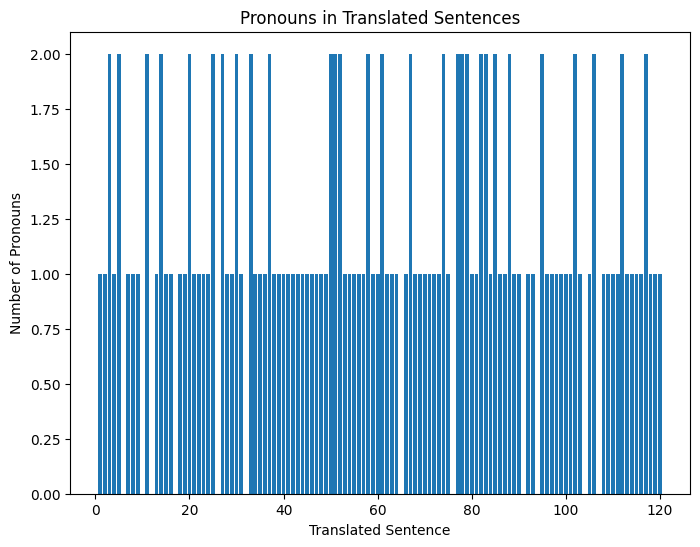

In [ ]:
import pandas as pd
import re
from matplotlib import pyplot as plt

# Read the eng-via-fin_translations.tsv file into a DataFrame
data = pd.read_csv('eng-via-fin_translations.tsv', sep='\t')

# Extract pronouns from the Translated sentences
translated_pronouns = []

for index, sentence in data.iterrows():
    translated_sentence = sentence['backtranslated']
    pronouns = re.findall(r'\b(?:he|him|his|she|her|hers|they|them|their|theirs)\b', translated_sentence, flags=re.IGNORECASE)
    translated_pronouns.append(pronouns)

# Print the pronouns for the Translated sentences
for index, pronouns in enumerate(translated_pronouns):
    print("Translated Sentence {}: Pronouns: {}".format(index + 1, pronouns))

# Save the output as a .png file
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(translated_pronouns) + 1), [len(pronouns) for pronouns in translated_pronouns])
plt.xlabel('Translated Sentence')
plt.ylabel('Number of Pronouns')
plt.title('Pronouns in Translated Sentences')
plt.savefig('translated_pronouns.png')


Gold Sentence 1: Pronouns: ['he']
Gold Sentence 2: Pronouns: ['his']
Gold Sentence 3: Pronouns: ['She', 'him']
Gold Sentence 4: Pronouns: ['their', 'their']
Gold Sentence 5: Pronouns: ['him', 'his']
Gold Sentence 6: Pronouns: ['her']
Gold Sentence 7: Pronouns: ['his']
Gold Sentence 8: Pronouns: ['he']
Gold Sentence 9: Pronouns: ['his']
Gold Sentence 10: Pronouns: ['him']
Gold Sentence 11: Pronouns: ['He', 'he']
Gold Sentence 12: Pronouns: ['they']
Gold Sentence 13: Pronouns: ['his']
Gold Sentence 14: Pronouns: ['She', 'she']
Gold Sentence 15: Pronouns: ['his']
Gold Sentence 16: Pronouns: ['him']
Gold Sentence 17: Pronouns: ['them']
Gold Sentence 18: Pronouns: ['their']
Gold Sentence 19: Pronouns: ['his']
Gold Sentence 20: Pronouns: ['they', 'their']
Gold Sentence 21: Pronouns: ['She', 'him']
Gold Sentence 22: Pronouns: ['his']
Gold Sentence 23: Pronouns: ['his']
Gold Sentence 24: Pronouns: ['she']
Gold Sentence 25: Pronouns: ['They', 'their']
Gold Sentence 26: Pronouns: ['his']
Gold Se

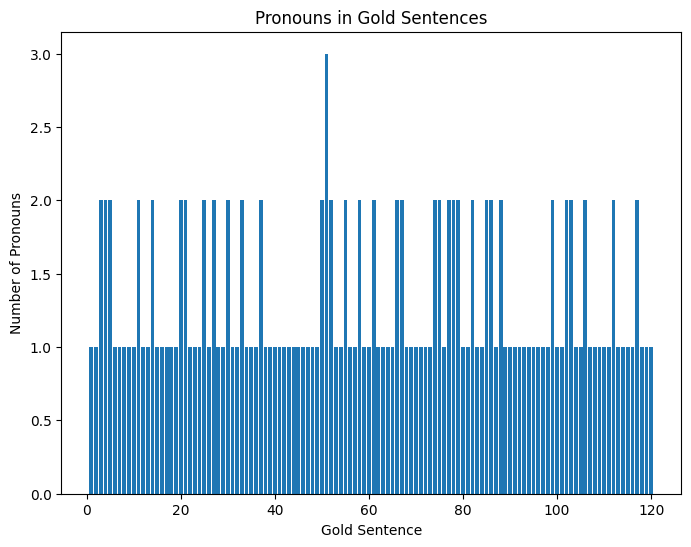

In [ ]:
import pandas as pd
import re
from matplotlib import pyplot as plt

# Read the eng-via-fin_translations.tsv file into a DataFrame
data = pd.read_csv('eng-via-fin_translations.tsv', sep='\t')

# Extract pronouns from the Gold sentences
gold_pronouns = []

for index, sentence in data.iterrows():
    gold_sentence = sentence['gold']
    pronouns = re.findall(r'\b(?:he|him|his|herself|she|her|hers|they|them|their|theirs|themselves)\b', gold_sentence, flags=re.IGNORECASE)
    gold_pronouns.append(pronouns)

# Print the pronouns for the Gold sentences
for index, pronouns in enumerate(gold_pronouns):
    print("Gold Sentence {}: Pronouns: {}".format(index + 1, pronouns))

# Save the output as a .png file
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(gold_pronouns) + 1), [len(pronouns) for pronouns in gold_pronouns])
plt.xlabel('Gold Sentence')
plt.ylabel('Number of Pronouns')
plt.title('Pronouns in Gold Sentences')
plt.savefig('gold_pronouns.png')


In [ ]:
pip install sentence-transformers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 97.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 84.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 97.3 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125926 sha256=f458610c4225ba5f836d5ce546ea5f618366ca4067a5f5dbfe172661f9ca30c0
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [7]:
import nltk
import numpy as np

precision_scores = []
recall_scores = []

def calculate_precision_recall(gold_sentence, backtranslated_sentence):
    gold_tokens, translated_tokens = nltk.word_tokenize(gold_sentence), nltk.word_tokenize(backtranslated_sentence)
    gold_unigrams, translated_unigrams = set(gold_tokens), set(translated_tokens)
    common_unigrams_length = len(gold_unigrams.intersection(translated_unigrams))
    precision = common_unigrams_length/ len(translated_unigrams)
    recall = common_unigrams_length / len(gold_unigrams)
    return precision, recall

def evaluate(data):
   precision_scores = [calculate_precision_recall(data['gold'][id], data['backtranslated'][id])[0] for id in range(len(data['backtranslated']))]
   recall_scores = [calculate_precision_recall(data['gold'][id], data['backtranslated'][id])[1] for id in range(len(data['backtranslated']))]
   mean_precision = np.mean(precision_scores)
   mean_recall = np.mean(recall_scores)
   return mean_precision, mean_recall
mean_precision, mean_recall = evaluate(data_frame)
print("Mean Unigram Precision:" + str(mean_precision))
print("Mean Unigram Recall:" + str(mean_recall))

# Mean Unigram Precision: 0.83
# Mean Unigram recall: 0.73

Mean Unigram Precision:0.8373440969362023
Mean Unigram Recall:0.7353764095214689


In [9]:
import re

def extract_pronouns(sentence):
   pronouns = ['he', 'him', 'his', 'she', 'her', 'hers', 'they', 'them', 'their', 'theirs']
   words = sentence.lower().split()
   return [word for word in words if word in pronouns]

data_frame['Gold_Pronouns'] = data_frame['gold'].apply(extract_pronouns)
data_frame['Translated_Pronouns'] = data_frame['backtranslated'].apply(extract_pronouns)
print(data_frame[['Gold_Pronouns', 'Translated_Pronouns']])
# iii.
# gold

# backtranslated

# Pronouns in gold

# pronouns in backtranslated

# Do any of you know where he lives?

# Does anyone know where he lives

# [he]

# [he]

# She made up her mind to try again.

# He decided to try again

# [she, her]

# [he]

# Tom locked his keys in his car.

# Tom locked the keys to his car.

# [his, his]

# [his]

      Gold_Pronouns Translated_Pronouns
0              [he]                [he]
1             [his]               [his]
2             [she]               [she]
3    [their, their]             [their]
4        [him, his]          [him, his]
..              ...                 ...
115           [his]               [his]
116       [him, he]           [him, he]
117           [his]               [his]
118           [his]               [her]
119           [him]               [him]

[120 rows x 2 columns]
